# Outlier Detection

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.metrics import classification_report
import datacleaner as dc

## Preprocess dataset

In [8]:
df = dc.get_data('baseball.csv') # original dataframe
df.head()
df.dtypes

Player              object
Number_seasons       int64
Games_played         int64
At_bats              int64
Runs                 int64
Hits                 int64
Doubles              int64
Triples              int64
Home_runs            int64
RBIs                 int64
Walks                int64
Strikeouts          object
Batting_average    float64
On_base_pct        float64
Slugging_pct       float64
Fielding_ave       float64
Position            object
Hall_of_Fame         int64
dtype: object

In [9]:
# seperate data and label
target = 'Hall_of_Fame'
df[target] = df[target].map({0 : 1, 1 : -1, 2 : -1}) # map normal to 1 and anomaly to -1 
ground_truth = np.asarray(df[target])
# print(ground_truth)
df_exclude_target = df[df.columns.difference([target])] # exclude target from data 
df_exclude_target.head() # dataframe excluding target

df_numeric_only = df_exclude_target.select_dtypes(include=[np.number])
# df_numeric_only = df_exclude_target.select_dtypes(include=[np.float64, np.int64])
df_numeric_only.head() # dataframe which only keeps numeric features

,At_bats,Batting_average,Doubles,Fielding_ave,Games_played,Hits,Home_runs,Number_seasons,On_base_pct,RBIs,Runs,Slugging_pct,Triples,Walks
0,12364,0.305,624,0.980,3298,3771,755,23,0.377,2297,2174,0.555,98,1402
1,4019,0.254,163,0.985,1165,1022,57,13,0.294,366,378,0.347,19,208
2,5557,0.286,249,0.974,1424,1588,9,13,0.343,394,844,0.353,48,453
3,4019,0.269,188,0.955,1281,1082,37,14,0.340,303,591,0.368,49,414
4,6606,0.277,295,0.994,1959,1832,336,17,0.339,1122,823,0.485,35,594


In [19]:
X = np.asarray(df_numeric_only)
print("Numeric data shape")
print(X.shape)
print("Normal shape")
print(X[:][ground_truth==1].shape)
print("Anomaly shape")
print(X[:][ground_truth==-1].shape)

Numeric data shape
(1340, 14)
Normal shape
(1215, 14)
Anomaly shape
(125, 14)


As we can see from above, the actual contamination is 0.093

## Detect outliers in one dimension

Outliers detected



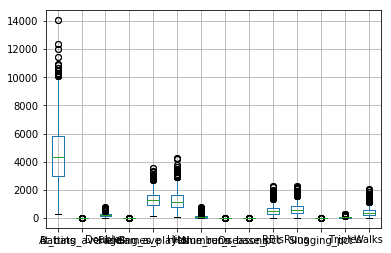

In [20]:
dc.identify_outliers(df_numeric_only, detailed = False)

## Detect outliers in multi dimension

In [21]:
parameters = {'n_estimators': [10, 20, 30, 40, 50],
             'contamination': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]}
# create classifier
# using isolation forest here
isof = IsolationForest()
clf = GridSearchCV(isof, parameters, scoring = 'f1', return_train_score = True)

# print(ground_truth)
clf.fit(X, ground_truth)
y_pred = clf.best_estimator_.predict(X)
# print(y_pred)

# report
print(classification_report(ground_truth, y_pred))
df_results = pd.DataFrame(clf.cv_results_)
df_results[["mean_test_score", "std_test_score", "params"]].sort_values(by=["mean_test_score"], ascending=False)

             precision    recall  f1-score   support

         -1       0.78      0.42      0.54       125
          1       0.94      0.99      0.96      1215

avg / total       0.93      0.93      0.93      1340



,mean_test_score,std_test_score,params
19,0.965682,0.005049,"{'contamination': 0.05, 'n_estimators': 50}"
17,0.963688,0.005760,"{'contamination': 0.05, 'n_estimators': 30}"
18,0.960912,0.007467,"{'contamination': 0.05, 'n_estimators': 40}"
16,0.959956,0.008767,"{'contamination': 0.05, 'n_estimators': 20}"
15,0.959039,0.007020,"{'contamination': 0.05, 'n_estimators': 10}"
23,0.958784,0.010130,"{'contamination': 0.1, 'n_estimators': 40}"
21,0.956979,0.004835,"{'contamination': 0.1, 'n_estimators': 20}"
11,0.956231,0.008181,"{'contamination': 0.01, 'n_estimators': 20}"
22,0.955877,0.009180,"{'contamination': 0.1, 'n_estimators': 30}"
12,0.955476,0.009023,"{'contamination': 0.01, 'n_estimators': 30}"


In [22]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f", title = ""):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)
    ax.set_title(title)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

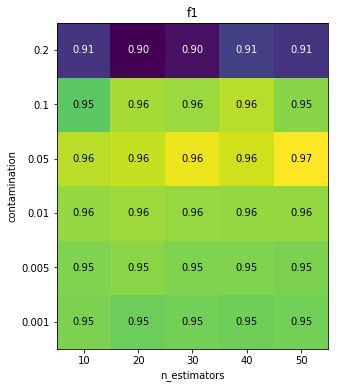

In [23]:
score = clf.cv_results_['mean_test_score'].reshape(6, 5)
_ = plt.figure(figsize=(10,6))
heatmap(score, xlabel='n_estimators', xticklabels=parameters['n_estimators'], \
        ylabel='contamination', yticklabels=parameters['contamination'], cmap="viridis", title='f1');
plt.show()

# Tune Parameters

In [45]:
from sklearn.metrics import f1_score
# read csv file
df = pd.read_csv('satellite.csv')
df.head()
# seperate data and label
target = 'Target'
# df[target] = df[target].map({0 : 1, 1 : -1, 2 : -1}) # map normal to 1 and anomaly to -1 
df['Target'] = df['Target'].map({"'Anomaly'": -1, "'Normal'": 1})
ground_truth = np.asarray(df[target])
# print(ground_truth)

# keep numerical features
df_exclude_target = df[df.columns.difference([target])] # exclude target from data 
df_exclude_target.head() # dataframe excluding target
df_numeric_only = df_exclude_target.select_dtypes(include=[np.number])
# df_numeric_only = df_exclude_target.select_dtypes(include=[np.float64, np.int64])
df_numeric_only.head() # dataframe which only keeps nume
X = np.asarray(df_numeric_only)
# print("Numeric data shape")
# print(X.shape)
# print("Normal shape")
# print(X[:][ground_truth==1].shape)
# print("Anomaly shape")
# print(X[:][ground_truth==-1].shape)

contaminations = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]
score_anomaly = []
score_normal = []

for contamination in contaminations:
    # create classifier
    isof = IsolationForest(contamination=contamination)
    # print(ground_truth)
    isof.fit(X)
    y_pred = isof.predict(X)
    # print(y_pred)

    anomaly, normal = f1_score(ground_truth, y_pred, average=None)
    score_anomaly.append(anomaly)
    score_normal.append(normal)

print(score_anomaly)
print(score_normal)

[0.14814814814814814, 0.5148514851485149, 0.6031746031746031, 0.519774011299435, 0.34545454545454546, 0.21196581196581196, 0.1187214611872146]
[0.993181144381856, 0.9951480344588574, 0.9950367282112369, 0.9915195051381821, 0.9781155015197568, 0.9520540821632865, 0.8940142778693025]


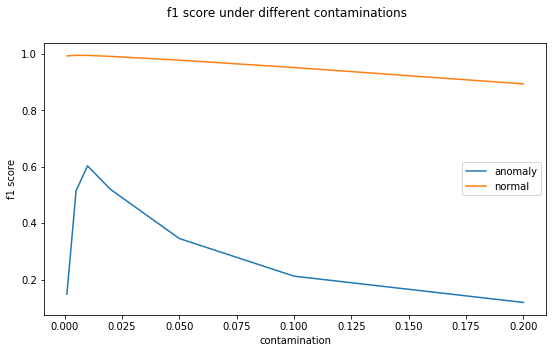

In [46]:
plt.figure(figsize=(9, 5))
plt.plot(contaminations, score_anomaly, label='anomaly')
plt.plot(contaminations, score_normal, label = 'normal')
plt.suptitle('f1 score under different contaminations')
plt.ylabel('f1 score')
plt.xlabel('contamination')
plt.legend()
plt.show()

Anomaly algorithms provided in scikit-learn normally ask for parameter contamination which is the proportion of outliers. As we can see from the figure, score reaches the optimal when the parameter contamination is set around the actual outlier proportion. However, it is unrealistic to know how many outliers there are in a raw dataset. Hence we have to estimate the contamination from the results of one-dimensional outlier detection in each feature.

## Package above steps into a function

In [18]:
def identify_outliers_multi(df, target='Target', variable=None, groupby=None, detailed=False):
    """
    Identify outliers in multi dimension
    """
    df[target] = df[target].map({0 : 1, 1 : -1, 2 : -1}) # map normal to 1 and anomaly to -1 
    df_exclude_target = df[df.columns.difference([target])] # exclude target from data
    df = df_exclude_target.select_dtypes(include=[np.number])
    # total length of the dataframe, used for computing contamination later
    total_length = len(df)
#     print(total_length)

    # Draw box plot for numeric variable
    # Outliers can be shown
    df.boxplot(column=variable, by=groupby)
    plt.draw()
    
    outliers_count = np.zeros(len(df.columns))
    df_outliers = {}
    flag = False
    df_union = pd.DataFrame()
    for i, col in enumerate(df.columns):
#         if(df[col].dtype in [np.number]): # bug! to be figured out 
        if(df[col].dtype == np.float64 or df[col].dtype == np.int64): 
            # first detect outliers in each column
            # keep only the ones that are out of +3 to -3 standard deviations in the column 'Data'.
            df_outliers[col] = df[~(np.abs(df[col]-df[col].mean())<(3*df[col].std()))] # ~ means the other way around
            # combine all the rows containing outliers in one feature
            df_union = df_union.combine_first(df_outliers[col])
#             print(df_outliers[col])
            if len(df_outliers[col]) != 0:
                outliers_count[i] = len(df_outliers[col])
                flag = True
                if detailed:                    
                    print("There are {} outliers in variable {}".format(len(df_outliers[col]), col))
                    print(df_outliers[col][col])
                    print("")
            else:
                if detailed:
                    print("No outliers are detected in variable {}".format(col))
                    print("")
    # Two options to estimate the propotion of outliers
    # One is to take the number of outliers in the feature containing most outliers
    # The other is to take the length of the union of rows containing outliers in any feature
#     print(outliers_count)
#     print(df_union)
#     max_outliers = max(outliers_count)
    max_outliers = len(df_union)
    
    
#     print("max outliers number is {}".format(max_outliers))
#     if flag:
#         print("Outliers detected")
#         print("")
#     else:
#         print("No outliers detected")
#         print("")
#     plt.show()
    contamination = max_outliers / total_length
    X = np.asarray(df)
    # to be extended later, for now isolation forest
    clf = IsolationForest()
    clf.fit(X)
    y_pred = clf.predict(X)
#     print(y_pred)
    outlier_index, = np.where(y_pred == -1)
#     print(outlier_index)
    print("*********************************************")
    print("Outliers detected in multi dimensional space:")
    print("*********************************************")
    df_outliers = df.iloc[outlier_index.tolist()]
#     print(df.iloc[outlier_index.tolist()])
    
    return df_outliers, y_pred.tolist()

## Case Study

In [25]:
df = dc.get_data('baseball.csv') # original dataframe
df_outliers, y_pred = identify_outliers_multi(df, target='Hall_of_Fame')
df_outliers

*********************************************
Outliers detected in multi dimensional space:
*********************************************


,At_bats,Batting_average,Doubles,Fielding_ave,Games_played,Hits,Home_runs,Number_seasons,On_base_pct,RBIs,Runs,Slugging_pct,Triples,Walks
0,12364,0.305,624,0.980,3298,3771,755,23,0.377,2297,2174,0.555,98,1402
22,9101,0.329,528,0.974,2276,2995,97,22,0.395,1879,1719,0.446,124,952
23,10230,0.262,394,0.972,2599,2677,83,18,0.313,791,1335,0.343,92,736
24,8856,0.310,440,0.948,2422,2749,45,20,0.399,1116,1319,0.398,102,1302
33,6353,0.318,401,0.970,1668,2019,238,13,0.395,1164,1224,0.534,128,774
45,9421,0.274,407,0.994,2528,2583,512,19,0.333,1636,1305,0.500,90,763
59,8198,0.260,366,0.977,2292,2135,338,19,0.346,1276,1236,0.436,28,805
63,9526,0.308,473,0.981,2386,2930,86,20,0.361,1575,1600,0.435,243,616
67,7658,0.267,381,0.990,2158,2048,389,17,0.345,1376,1091,0.476,24,891
74,3028,0.170,45,0.972,947,516,2,11,0.194,193,138,0.201,21,88


### Evaluate the outlier detection performance

In [26]:
# report
y_pred = np.asarray(y_pred)
# print(y_pred)
print(classification_report(ground_truth, y_pred))


             precision    recall  f1-score   support

         -1       0.59      0.63      0.61       125
          1       0.96      0.95      0.96      1215

avg / total       0.93      0.92      0.93      1340



# Evaluation of algorithms

Anomaly detection algorithms evaluated:<br>
onesvm, isolationforest, lof<br>
Datasets used:<br>
satellite, skin, baseball, speech

In [35]:
data = {'Dataset': ['baseball', 'satellite', 'spambase', 'speech'], 
        'Size': [1340, 5100, 4601, 3686],
        'Dimension': [14, 36, 57, 400],
        'Outliers': [125, 75, 1813, 61],
        'Percentage': [0.093, 0.015, 0.394, 0.017]}
df_dataset = pd.DataFrame(data)
df_dataset.style

,Dataset,Dimension,Outliers,Percentage,Size
0,baseball,14,125,0.093,1340
1,satellite,36,75,0.015,5100
2,spambase,57,1813,0.394,4601
3,speech,400,61,0.017,3686


## Dataset: baseball

In [30]:
from sklearn.metrics import f1_score

print("Dataset: baseball:")
# read csv file
df = pd.read_csv('baseball.csv')
df.head()

# seperate data and label
target = 'Hall_of_Fame'
# target = 'Target'
df[target] = df[target].map({0 : 1, 1 : -1, 2 : -1}) # map normal to 1 and anomaly to -1 
# df['Target'] = df['Target'].map({"'Anomaly'": -1, "'Normal'": 1})

# set ground truth
ground_truth = np.asarray(df[target])
# print(ground_truth)

# keep numerical features
df_exclude_target = df[df.columns.difference([target])] # exclude target from data 
df_exclude_target.head() # dataframe excluding target
df_numeric_only = df_exclude_target.select_dtypes(include=[np.number])
# df_numeric_only = df_exclude_target.select_dtypes(include=[np.float64, np.int64])
df_numeric_only.head() # dataframe which only keeps numerical features

# transform to numpy arrays
X = np.asarray(df_numeric_only)
print("Numeric data shape")
print(X.shape)
print("Normal shape")
print(X[:][ground_truth==1].shape)
print("Anomaly shape")
print(X[:][ground_truth==-1].shape)

baseball_anomaly_f1 = []
baseball_normal_f1 = []

# isolation forest
isof = IsolationForest(contamination=0.093)
isof.fit(X)
y_pred = isof.predict(X)
print("isolation forest:")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
baseball_anomaly_f1.append(f1_anomaly)
baseball_normal_f1.append(f1_normal)

# local outlier factor
lof = LocalOutlierFactor(n_neighbors=20, contamination = 0.093)
y_pred = lof.fit_predict(X)
print("local outlier factor")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
baseball_anomaly_f1.append(f1_anomaly)
baseball_normal_f1.append(f1_normal)

# one class svm
ocsvm = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
ocsvm.fit(X)
y_pred = ocsvm.predict(X)
print("one class svm")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
baseball_anomaly_f1.append(f1_anomaly)
baseball_normal_f1.append(f1_normal)

# print(baseball_anomaly_f1)
# print(baseball_normal_f1)

Dataset: baseball:
Numeric data shape
(1340, 14)
Normal shape
(1215, 14)
Anomaly shape
(125, 14)
isolation forest:
f1 score for anomaly is 0.584 and for normal is 0.9572016460905349
local outlier factor
f1 score for anomaly is 0.24 and for normal is 0.9218106995884774
one class svm
f1 score for anomaly is 0.16792249730893433 and for normal is 0.5585379782981154


## Dataset: satellite

In [32]:
# read csv file
df = pd.read_csv('satellite.csv')
df.head()
# seperate data and label
target = 'Target'
# df[target] = df[target].map({0 : 1, 1 : -1, 2 : -1}) # map normal to 1 and anomaly to -1 
df['Target'] = df['Target'].map({"'Anomaly'": -1, "'Normal'": 1})
ground_truth = np.asarray(df[target])
# print(ground_truth)

# keep numerical features
df_exclude_target = df[df.columns.difference([target])] # exclude target from data 
df_exclude_target.head() # dataframe excluding target
df_numeric_only = df_exclude_target.select_dtypes(include=[np.number])
# df_numeric_only = df_exclude_target.select_dtypes(include=[np.float64, np.int64])
df_numeric_only.head() # dataframe which only keeps nume
X = np.asarray(df_numeric_only)
print("Numeric data shape")
print(X.shape)
print("Normal shape")
print(X[:][ground_truth==1].shape)
print("Anomaly shape")
print(X[:][ground_truth==-1].shape)

satellite_anomaly_f1 = []
satellite_normal_f1 = []

# isolation forest
isof = IsolationForest(contamination=0.015)
isof.fit(X)
y_pred = isof.predict(X)
print("isolation forest:")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
satellite_anomaly_f1.append(f1_anomaly)
satellite_normal_f1.append(f1_normal)

# local outlier factor
lof = LocalOutlierFactor(n_neighbors=20, contamination = 0.015)
y_pred = lof.fit_predict(X)
print("local outlier factor")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
satellite_anomaly_f1.append(f1_anomaly)
satellite_normal_f1.append(f1_normal)

# one class svm
ocsvm = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
ocsvm.fit(X)
y_pred = ocsvm.predict(X)
print("one class svm")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
satellite_anomaly_f1.append(f1_anomaly)
satellite_normal_f1.append(f1_normal)

# print(satellite_anomaly_f1)
# print(satellite_normal_f1)

Numeric data shape
(5100, 36)
Normal shape
(5025, 36)
Anomaly shape
(75, 36)
isolation forest:
f1 score for anomaly is 0.5789473684210527 and for normal is 0.9936305732484076
local outlier factor
f1 score for anomaly is 0.25 and for normal is 0.9886544585987259
one class svm
f1 score for anomaly is 0.0 and for normal is 0.5562632696390658


## Dataset: spambase

In [34]:
# read csv file
df = pd.read_csv('spambase.csv')
df.head()
# seperate data and label
target = 'class'
df[target] = df[target].map({0 : 1, 1 : -1}) # map normal to 1 and anomaly to -1 
# df['Target'] = df['Target'].map({"'Anomaly'": -1, "'Normal'": 1})
ground_truth = np.asarray(df[target])
# print(ground_truth)

# keep only numrical features
df_exclude_target = df[df.columns.difference([target])] # exclude target from data 
df_exclude_target.head() # dataframe excluding target
df_numeric_only = df_exclude_target.select_dtypes(include=[np.number])
# df_numeric_only = df_exclude_target.select_dtypes(include=[np.float64, np.int64])
df_numeric_only.head() # dataframe which only keeps nume
X = np.asarray(df_numeric_only)
print("Numeric data shape")
print(X.shape)
print("Normal shape")
print(X[:][ground_truth==1].shape)
print("Anomaly shape")
print(X[:][ground_truth==-1].shape)

spambase_anomaly_f1 = []
spambase_normal_f1 = []

# isolation forest
isof = IsolationForest(contamination=0.39)
isof.fit(X)
y_pred = isof.predict(X)
print("isolation forest:")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
spambase_anomaly_f1.append(f1_anomaly)
spambase_normal_f1.append(f1_normal)

# local outlier factor
lof = LocalOutlierFactor(n_neighbors=20, contamination = 0.39)
y_pred = lof.fit_predict(X)
print("local outlier factor")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
spambase_anomaly_f1.append(f1_anomaly)
spambase_normal_f1.append(f1_normal)

# one class svm
ocsvm = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
ocsvm.fit(X)
y_pred = ocsvm.predict(X)
print("one class svm")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
spambase_anomaly_f1.append(f1_anomaly)
spambase_normal_f1.append(f1_normal)

# print(spambase_anomaly_f1)
# print(spambase_normal_f1)

Numeric data shape
(4601, 57)
Normal shape
(2788, 57)
Anomaly shape
(1813, 57)
isolation forest:
f1 score for anomaly is 0.4639689578713969 and for normal is 0.6542724347515194
local outlier factor
f1 score for anomaly is 0.3569844789356985 and for normal is 0.5852699320700749
one class svm
f1 score for anomaly is 0.47528609690771856 and for normal is 0.577036310107949


## Dataset: speech

In [37]:
# read csv file
df = pd.read_csv('speech.csv')
df.head()
# seperate data and label
target = 'Target'
# df[target] = df[target].map({0 : 1, 1 : -1, 2 : -1}) # map normal to 1 and anomaly to -1 
df['Target'] = df['Target'].map({"'Anomaly'": -1, "'Normal'": 1})
ground_truth = np.asarray(df[target])
print(ground_truth)
df_exclude_target = df[df.columns.difference([target])] # exclude target from data 
df_exclude_target.head() # dataframe excluding target

df_numeric_only = df_exclude_target.select_dtypes(include=[np.number])
# df_numeric_only = df_exclude_target.select_dtypes(include=[np.float64, np.int64])
df_numeric_only.head() # dataframe which only keeps nume
X = np.asarray(df_numeric_only)
print("Numeric data shape")
print(X.shape)
print("Normal shape")
print(X[:][ground_truth==1].shape)
print("Anomaly shape")
print(X[:][ground_truth==-1].shape)

speech_anomaly_f1 = []
speech_normal_f1 = []

# isolation forest
isof = IsolationForest(contamination=0.017)
isof.fit(X)
y_pred = isof.predict(X)
print("isolation forest:")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
speech_anomaly_f1.append(f1_anomaly)
speech_normal_f1.append(f1_normal)

# local outlier factor
lof = LocalOutlierFactor(n_neighbors=20, contamination = 0.017)
y_pred = lof.fit_predict(X)
print("local outlier factor")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
speech_anomaly_f1.append(f1_anomaly)
speech_normal_f1.append(f1_normal)

# one class svm
ocsvm = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
ocsvm.fit(X)
y_pred = ocsvm.predict(X)
print("one class svm")
# print(y_pred)
f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
print("f1 score for anomaly is {} and for normal is {}".format(f1_anomaly, f1_normal))
speech_anomaly_f1.append(f1_anomaly)
speech_normal_f1.append(f1_normal)

# print(speech_anomaly_f1)
# print(speech_normal_f1)

[-1 -1 -1 ...  1  1  1]
Numeric data shape
(3686, 400)
Normal shape
(3625, 400)
Anomaly shape
(61, 400)
isolation forest:
f1 score for anomaly is 0.08064516129032258 and for normal is 0.984271523178808
local outlier factor
f1 score for anomaly is 0.03225806451612903 and for normal is 0.9834437086092715
one class svm
f1 score for anomaly is 0.02927339257710403 and for normal is 0.6598278072907126


In [38]:
# # read csv file
# df = pd.read_csv('skin_segmentation.csv')
# df.head()
# # seperate data and label
# target = 'Class'
# df[target] = df[target].map({1 : -1, 2 : 1}) # map normal to 1 and anomaly to -1 
# # df['Target'] = df['Target'].map({"'Anomaly'": -1, "'Normal'": 1})
# ground_truth = np.asarray(df[target])
# print(ground_truth)
# df_exclude_target = df[df.columns.difference([target])] # exclude target from data 
# df_exclude_target.head() # dataframe excluding target

# df_numeric_only = df_exclude_target.select_dtypes(include=[np.number])
# # df_numeric_only = df_exclude_target.select_dtypes(include=[np.float64, np.int64])
# df_numeric_only.head() # dataframe which only keeps nume
# X = np.asarray(df_numeric_only)
# print("Numeric data shape")
# print(X.shape)
# print("Normal shape")
# print(X[:][ground_truth==1].shape)
# print("Anomaly shape")
# print(X[:][ground_truth==-1].shape)

# from sklearn.metrics import f1_score
# # create classifier
# isof = IsolationForest(contamination=0.207)
# # clf = LocalOutlierFactor(n_neighbors=20, contamination = 0.1)
# # clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
# skin_anomaly_f1 = []
# skin_normal_f1 = []
# # groundtruth and prediction
# print(ground_truth)
# isof.fit(X)
# y_pred = isof.predict(X)
# print(y_pred)

# # report
# f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
# print(f1_anomaly, f1_normal)
# skin_anomaly_f1.append(f1_anomaly)
# skin_normal_f1.append(f1_normal)


# lof = LocalOutlierFactor(n_neighbors=20, contamination = 0.207)
# y_pred = lof.fit_predict(X)
# # report
# f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
# print(f1_anomaly, f1_normal)
# skin_anomaly_f1.append(f1_anomaly)
# skin_normal_f1.append(f1_normal)

# ocsvm = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
# ocsvm.fit(X)
# y_pred = ocsvm.predict(X)
# print(y_pred)

# # report
# f1_anomaly, f1_normal = f1_score(ground_truth, y_pred, average=None)
# print(f1_anomaly, f1_normal)
# skin_anomaly_f1.append(f1_anomaly)
# skin_normal_f1.append(f1_normal)

# print(skin_anomaly_f1)
# print(skin_normal_f1)

In [39]:
print("baseball")
print(baseball_anomaly_f1)
print(baseball_normal_f1)
print("satellite")
print(satellite_anomaly_f1)
print(satellite_normal_f1)
print("spambase")
print(spambase_anomaly_f1)
print(spambase_normal_f1)
print("speech")
print(speech_anomaly_f1)
print(speech_normal_f1)

baseball
[0.584, 0.24, 0.16792249730893433]
[0.9572016460905349, 0.9218106995884774, 0.5585379782981154]
satellite
[0.5789473684210527, 0.25, 0.0]
[0.9936305732484076, 0.9886544585987259, 0.5562632696390658]
spambase
[0.4639689578713969, 0.3569844789356985, 0.47528609690771856]
[0.6542724347515194, 0.5852699320700749, 0.577036310107949]
speech
[0.08064516129032258, 0.03225806451612903, 0.02927339257710403]
[0.984271523178808, 0.9834437086092715, 0.6598278072907126]


In [40]:
isof_anomaly_score = []
isof_anomaly_score.append(baseball_anomaly_f1[0])
isof_anomaly_score.append(satellite_anomaly_f1[0])
isof_anomaly_score.append(spambase_anomaly_f1[0])
isof_anomaly_score.append(speech_anomaly_f1[0])
print(isof_anomaly_score)
isof_normal_score = []
isof_normal_score.append(baseball_normal_f1[0])
isof_normal_score.append(satellite_normal_f1[0])
isof_normal_score.append(spambase_normal_f1[0])
isof_normal_score.append(speech_normal_f1[0])
print(isof_normal_score)

lof_anomaly_score = []
lof_anomaly_score.append(baseball_anomaly_f1[1])
lof_anomaly_score.append(satellite_anomaly_f1[1])
lof_anomaly_score.append(spambase_anomaly_f1[1])
lof_anomaly_score.append(speech_anomaly_f1[1])
print(lof_anomaly_score)
lof_normal_score = []
lof_normal_score.append(baseball_normal_f1[1])
lof_normal_score.append(satellite_normal_f1[1])
lof_normal_score.append(spambase_normal_f1[1])
lof_normal_score.append(speech_normal_f1[1])
print(lof_normal_score)

ocsvm_anomaly_score = []
ocsvm_anomaly_score.append(baseball_anomaly_f1[2])
ocsvm_anomaly_score.append(satellite_anomaly_f1[2])
ocsvm_anomaly_score.append(spambase_anomaly_f1[2])
ocsvm_anomaly_score.append(speech_anomaly_f1[2])
print(ocsvm_anomaly_score)
ocsvm_normal_score = []
ocsvm_normal_score.append(baseball_normal_f1[2])
ocsvm_normal_score.append(satellite_normal_f1[2])
ocsvm_normal_score.append(spambase_normal_f1[2])
ocsvm_normal_score.append(speech_normal_f1[2])
print(ocsvm_normal_score)

[0.584, 0.5789473684210527, 0.4639689578713969, 0.08064516129032258]
[0.9572016460905349, 0.9936305732484076, 0.6542724347515194, 0.984271523178808]
[0.24, 0.25, 0.3569844789356985, 0.03225806451612903]
[0.9218106995884774, 0.9886544585987259, 0.5852699320700749, 0.9834437086092715]
[0.16792249730893433, 0.0, 0.47528609690771856, 0.02927339257710403]
[0.5585379782981154, 0.5562632696390658, 0.577036310107949, 0.6598278072907126]


In [41]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=['baseball', 'satellite', 'spambase', 'speech'],
    y=isof_anomaly_score,
    name='Isolation Forest',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=['baseball', 'satellite', 'spambase', 'speech'],
    y=lof_anomaly_score,
    name='Local Outlier Factor',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

trace2 = go.Bar(
    x=['baseball', 'satellite', 'spambase', 'speech'],
    y=ocsvm_anomaly_score,
    name='One Class SVM',
    marker=dict(
        color='rgb(107, 107, 107)',
    )
)

data = [trace0, trace1, trace2]
layout = go.Layout(
    title="Anomaly class f1 score",
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [42]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=['baseball', 'satellite', 'spambase', 'speech'],
    y=isof_normal_score,
    name='Isolation Forest',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=['baseball', 'satellite', 'spambase', 'speech'],
    y=lof_normal_score,
    name='Local Outlier Factor',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

trace2 = go.Bar(
    x=['baseball', 'satellite', 'spambase', 'speech'],
    y=ocsvm_normal_score,
    name='One Class SVM',
    marker=dict(
        color='rgb(107, 107, 107)',
    )
)

data = [trace0, trace1, trace2]
layout = go.Layout(
    title="Normal class f1 score",
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')